In [29]:
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [64]:
dataset = tfds.load('fashion_mnist', batch_size = 32, as_supervised=True)

In [83]:
train = dataset['train'].repeat().prefetch(1)
test = dataset['test'].prefetch(1)

tf.Tensor(2, shape=(), dtype=int64)


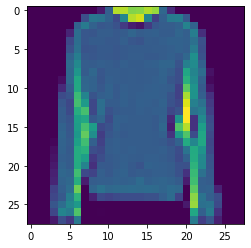

In [95]:
for item in train:
    image = item[0]
    label = item[1]
    plt.imshow(image[0])
    print(label[0])
    break

In [70]:
model = keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), 1, activation = 'relu', input_shape = [28, 28, 1], padding = 'same'),
    keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, (2,2), 1, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, (2,2), 1, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(512, (2,2), 1, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=10, activation='softmax'),
])

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 7, 7, 128)         32896     
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 3, 3, 512)       

In [71]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [72]:
model.fit(train, steps_per_epoch = 500, epochs = 100)

Epoch 1/100
500/500 [==============================] - 10s 20ms/step - loss: 1.6198 - accuracy: 0.3964
Epoch 2/100
500/500 [==============================] - 10s 20ms/step - loss: 0.8715 - accuracy: 0.6774
Epoch 3/100
500/500 [==============================] - 10s 20ms/step - loss: 0.7137 - accuracy: 0.7368
Epoch 4/100
500/500 [==============================] - 10s 20ms/step - loss: 0.6315 - accuracy: 0.7678
Epoch 5/100
500/500 [==============================] - 10s 20ms/step - loss: 0.5919 - accuracy: 0.7894
Epoch 6/100
500/500 [==============================] - 10s 21ms/step - loss: 0.5493 - accuracy: 0.8099
Epoch 7/100
500/500 [==============================] - 10s 20ms/step - loss: 0.5164 - accuracy: 0.8227
Epoch 8/100
500/500 [==============================] - 10s 21ms/step - loss: 0.4802 - accuracy: 0.8351
Epoch 9/100
500/500 [==============================] - 10s 20ms/step - loss: 0.4753 - accuracy: 0.8361
Epoch 10/100
500/500 [==============================] - 10s 21ms/step - l

500/500 [==============================] - 11s 21ms/step - loss: 0.1699 - accuracy: 0.9384
Epoch 80/100
500/500 [==============================] - 10s 21ms/step - loss: 0.1761 - accuracy: 0.9351
Epoch 81/100
500/500 [==============================] - 10s 20ms/step - loss: 0.1657 - accuracy: 0.9404
Epoch 82/100
500/500 [==============================] - 10s 20ms/step - loss: 0.1580 - accuracy: 0.9424
Epoch 83/100
500/500 [==============================] - 10s 20ms/step - loss: 0.1707 - accuracy: 0.9399
Epoch 84/100
500/500 [==============================] - 10s 20ms/step - loss: 0.1726 - accuracy: 0.9384
Epoch 85/100
500/500 [==============================] - 10s 20ms/step - loss: 0.1624 - accuracy: 0.9412
Epoch 86/100
500/500 [==============================] - 10s 20ms/step - loss: 0.1604 - accuracy: 0.9451
Epoch 87/100
500/500 [==============================] - 10s 20ms/step - loss: 0.1523 - accuracy: 0.9448
Epoch 88/100
500/500 [==============================] - 10s 20ms/step - loss:

In [79]:
test_loss, test_accuracy = model.evaluate(test)
print("test_loss = ", test_loss)
print("test_accuracy = ", test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.3688 - accuracy: 0.9087
test_loss =  0.3688097298145294
test_accuracy =  0.9086999893188477


we can see that it has an accuracy of 90% which is preety good

In [80]:
for item in train:
    image = item['image']
    label = item['label']
    print(image.shape)
    plt.imshow(image[0, :, :, 0])
    model.predict(image[0, :, :, 0])
    print(label[0])
    break

TypeError: tuple indices must be integers or slices, not str

In [96]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Predictions =  Pullover
Pullover


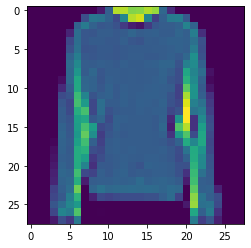

In [109]:
for item in train:
    image = item[0]
    label = item[1]
    inp = np.reshape(image[0], (-1, 28, 28, 1))
    predictions = model.predict(inp)
    print("Predictions = ", class_names[list(predictions[0]).index(max(predictions[0]))])
    plt.imshow(image[0])
    print( class_names[label[0]])
    break